In [1]:
!pip install mpltern
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd
import numpy as np
import mpltern

In [2]:
#ĐỌC DỮ LIỆU - IMPORT DATA
df = pd.read_excel('https://github.com/pgiaphu/Viet-Nam-Du-Lieu/raw/main/D%E1%BB%AF%20li%E1%BB%87u%20th%C3%B4/GDP_SECTOR_WORLDBANK.xlsx')
df.head()

,Country Name,Country Code,Date,Manufacturing,Services,"Agriculture, forestry, and fishing",Industrial
0,Afghanistan,AFG,2002.0,18.822752,36.151155,38.627892,23.810127
1,Afghanistan,AFG,2003.0,16.923866,37.444804,37.418855,22.710864
2,Afghanistan,AFG,2004.0,17.554006,41.110895,29.721067,26.226790
3,Afghanistan,AFG,2005.0,16.598212,39.007787,31.114855,26.812099
4,Afghanistan,AFG,2006.0,16.385537,39.831024,28.635969,28.210768


# **#TIẾNG VIỆT**

/tmp/ipython-input-1642671958.py:345: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0)
/tmp/ipython-input-1642671958.py:345: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0)


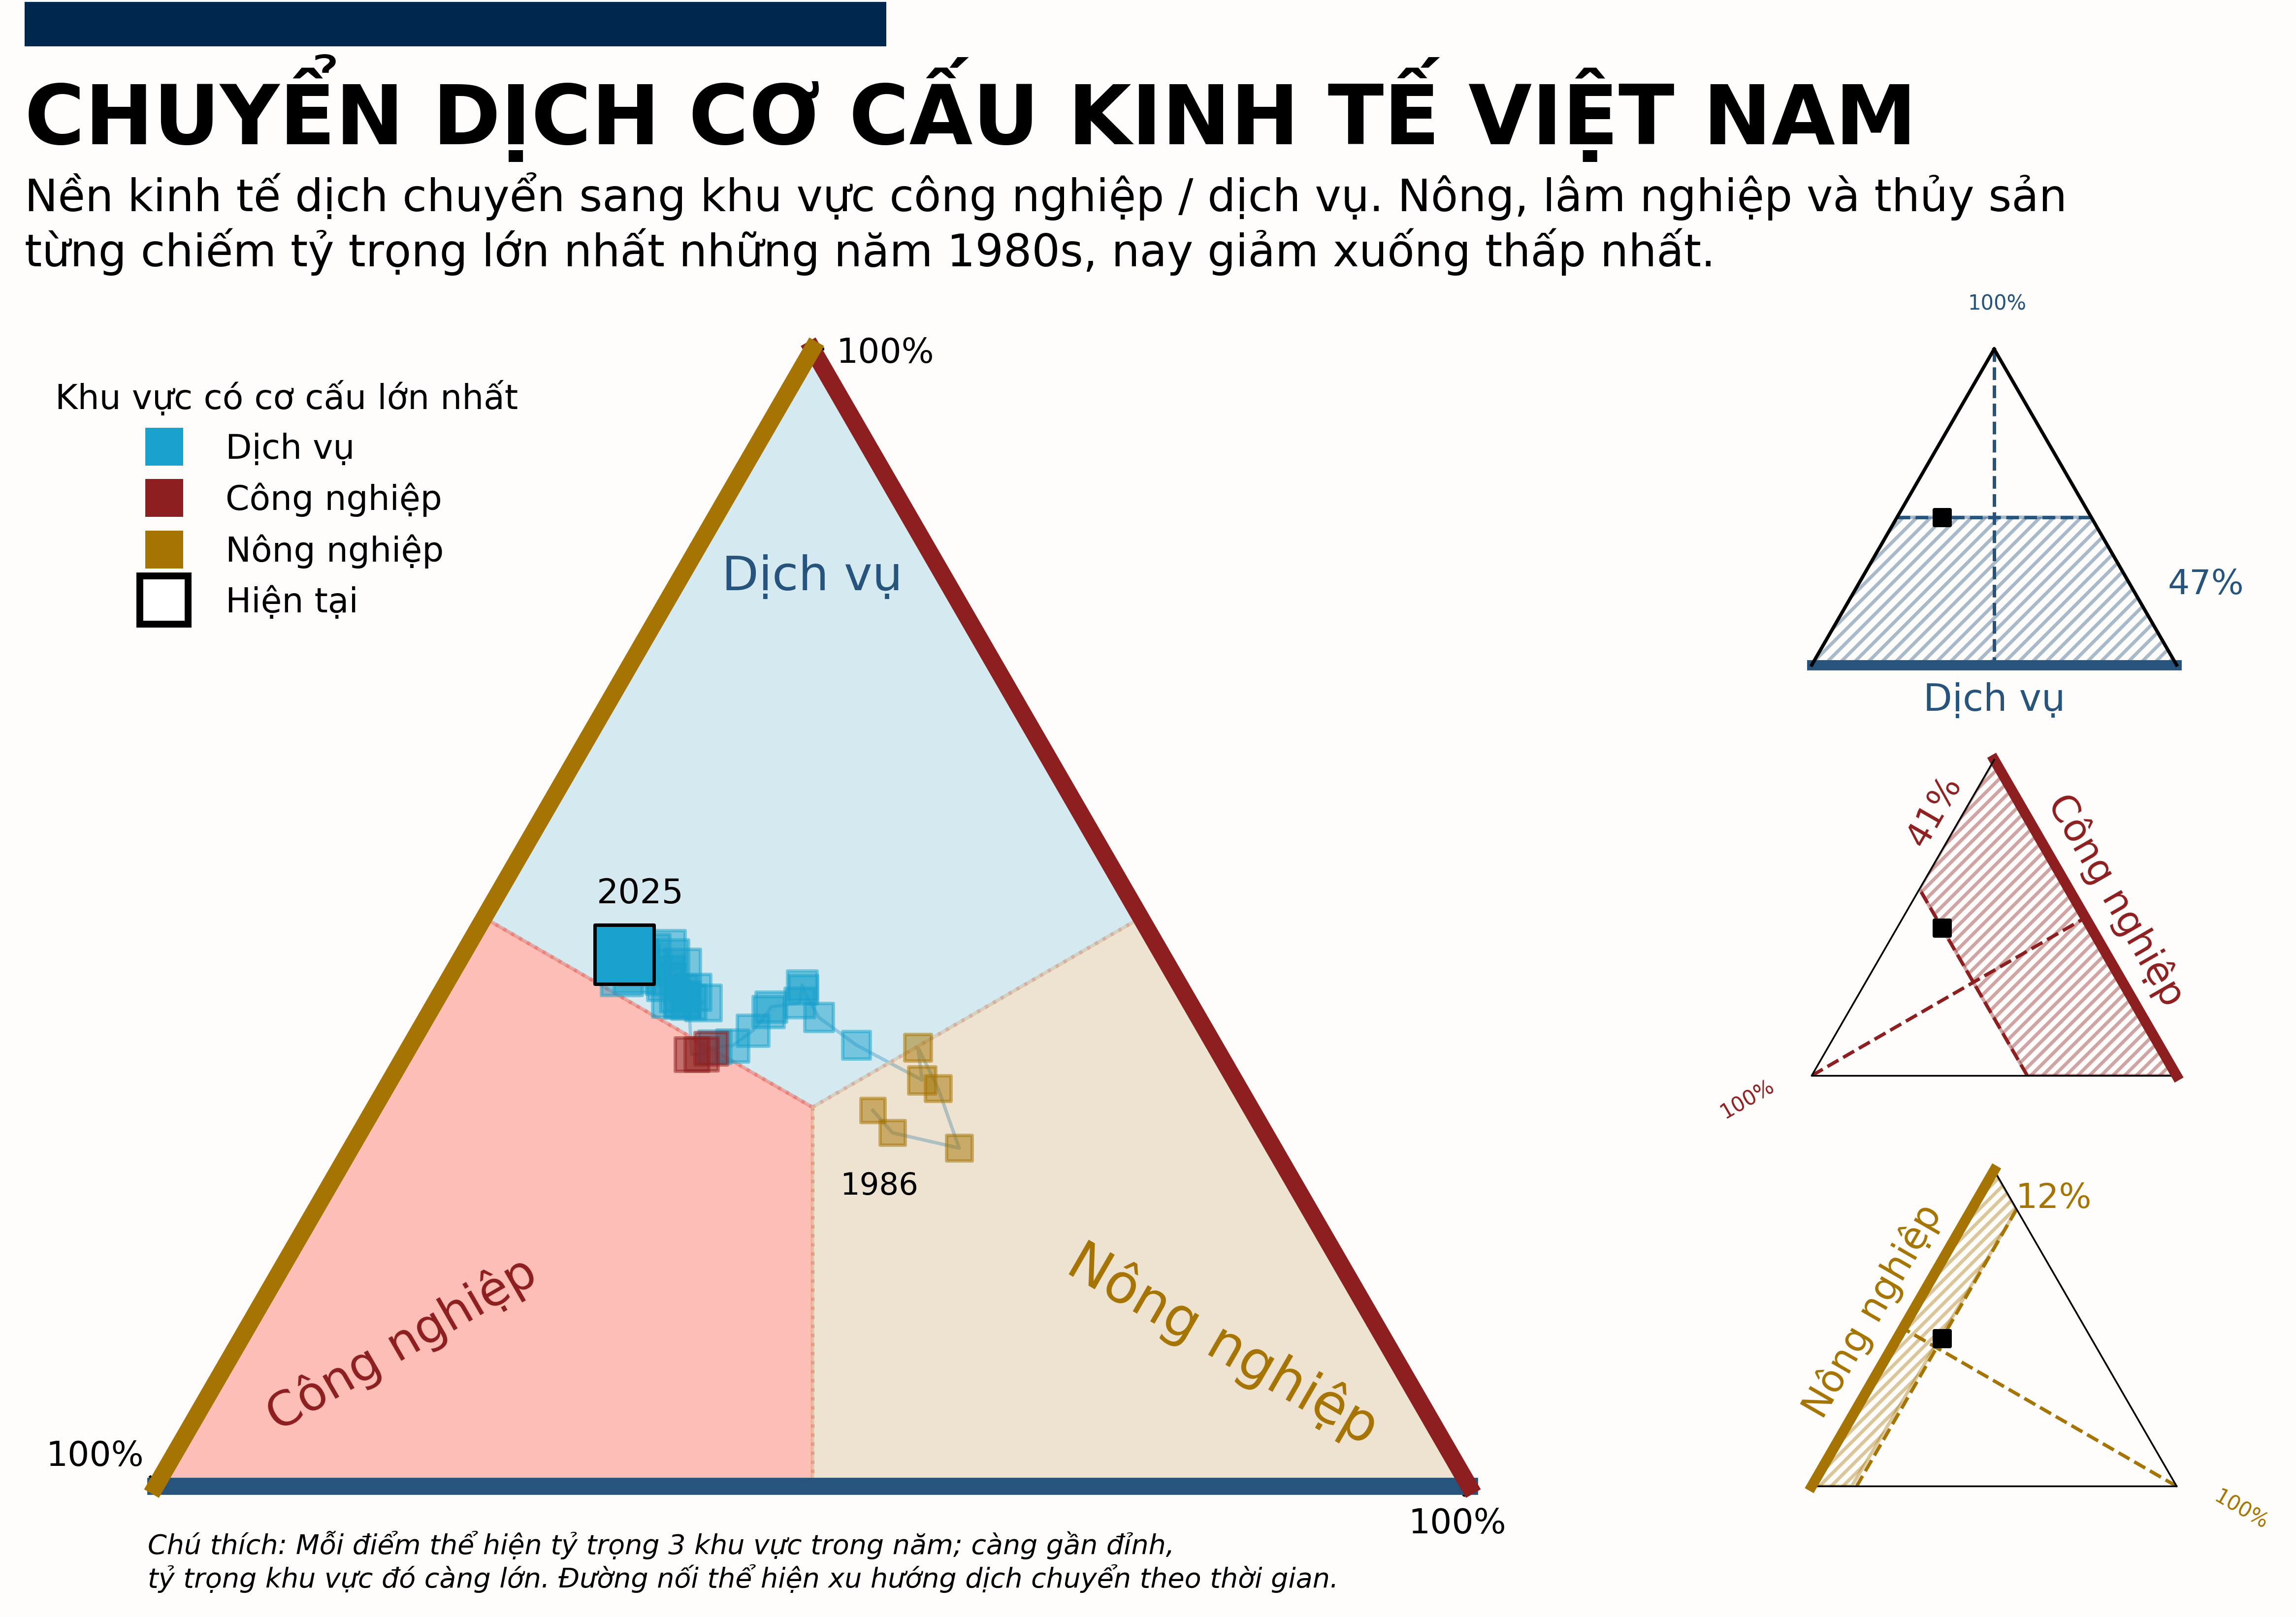

In [252]:
# Lọc dữ liệu cho Việt Nam (không dùng .copy() theo yêu cầu của bạn; giữ nguyên logic ban đầu)
dataset = df[df['Country Name']=='Viet Nam']

# Chọn các cột cần thiết
dataset = dataset[['Date','Services','Agriculture, forestry, and fishing',	'Industrial']]

# Tính tổng 3 khu vực để chuẩn hoá (normalization)
dataset['Total'] = dataset['Services'] + dataset['Agriculture, forestry, and fishing'] + dataset['Industrial']

# Chuẩn hoá các cột để tổng bằng 100 (phần trăm)
dataset['Services'] = (dataset['Services'] / dataset['Total']) * 100
dataset['Agriculture, forestry, and fishing'] = (dataset['Agriculture, forestry, and fishing'] / dataset['Total']) * 100
dataset['Industrial'] = (dataset['Industrial'] / dataset['Total']) * 100

# Xoá cột 'Total' vì không còn cần
dataset = dataset.drop(columns=['Total'])
dataset = dataset[['Date','Services','Agriculture, forestry, and fishing',	'Industrial']]

# Đổi tên cột sang tiếng Việt để hiển thị trên biểu đồ
dataset.rename(columns={
    'Services':'Dịch vụ',
    'Industrial':'Công nghiệp',
    'Agriculture, forestry, and fishing':'Nông, lâm nghiệp và thủy sản'
}, inplace=True)

# Sắp theo Date tăng dần (giúp đường nối thể hiện xu hướng theo thời gian)
dataset = dataset.sort_values('Date')

# -------------------------
# TẠO BIỂU ĐỒ TERNARY
# -------------------------
# Kích thước figure, dpi và màu nền
fig = plt.figure(figsize=(10,6), dpi=500, constrained_layout=True, facecolor='#fcf4e1')

# GridSpec: cột trái lớn (~75%), cột phải nhỏ cho các ô hướng dẫn
gs = fig.add_gridspec(
    nrows=3,
    ncols=2,
    width_ratios=[5, 1],
    left=0.02,
    right=0.98,
    wspace=0.0,   # <-- khoảng cách giữa các cột = 0 để ax0 chiếm nhiều không gian
    hspace=0.3
)

# Axes chính (ax0) và 3 axes trợ giúp (ax1, ax2, ax3)
ax0 = fig.add_subplot(gs[:, 0], projection='ternary')  # biểu đồ chính (chiếm 3 hàng, cột 0)
ax1 = fig.add_subplot(gs[0, 1], projection='ternary')  # hướng dẫn đọc trục Dịch vụ
ax2 = fig.add_subplot(gs[1, 1], projection='ternary')  # hướng dẫn đọc trục Công nghiệp
ax3 = fig.add_subplot(gs[2, 1], projection='ternary')  # hướng dẫn đọc trục Nông nghiệp

# Làm nền các axes hơi trong suốt để đẹp
fig.patch.set_alpha(0.1)
ax0.patch.set_alpha(0.1)
ax1.patch.set_alpha(0.1)
ax2.patch.set_alpha(0.1)
ax3.patch.set_alpha(0.1)

# Định nghĩa bảng màu cho từng khu vực (sử dụng trong scatter và legend)
color_map = {
    'Nông, lâm nghiệp và thủy sản': '#A57402',  # Màu cho Nông nghiệp
    'Dịch vụ': '#18a1cd',                       # Màu cho Dịch vụ
    'Công nghiệp': '#8E1F20'                    # Màu cho Công nghiệp
}

# Xác định khu vực chiếm ưu thế mỗi hàng (để tô màu điểm)
cols_to_check = ['Dịch vụ', 'Công nghiệp', 'Nông, lâm nghiệp và thủy sản']
dataset['dominant_category'] = dataset[cols_to_check].idxmax(axis=1)
point_colors = dataset['dominant_category'].map(color_map)

# Kích thước điểm: co dãn từ min_size (cũ nhất) -> max_size (mới nhất) để thể hiện thời gian
min_size = 50  # Kích thước cho điểm dữ liệu cũ nhất
max_size = 150 # Kích thước cho điểm dữ liệu mới nhất
point_sizes = np.linspace(min_size, max_size, len(dataset))

# Vẽ đường nối các điểm theo thứ tự thời gian để thấy xu hướng
ax0.plot(
    dataset["Dịch vụ"], dataset["Công nghiệp"], dataset["Nông, lâm nghiệp và thủy sản"],
    color='#0077b6',
    marker='o', markersize=0, markerfacecolor='#caf0f8', markeredgecolor='#0077b6',
    linestyle='-', linewidth=1, alpha=0.5,
    label='Xu hướng theo thời gian', zorder=0
)

# Vẽ điểm dữ liệu (scatter) lên trên heatmap/region
ax0.scatter(
    dataset["Dịch vụ"], dataset["Công nghiệp"], dataset["Nông, lâm nghiệp và thủy sản"],
    c=point_colors,
    edgecolors=point_colors,
    s=point_sizes,
    marker='s',
    label='Điểm dữ liệu',
    alpha=0.5
)

# ---------- Highlight (điểm nổi bật)
# Chỉnh highlight_date theo dữ liệu của bạn (ví dụ: 2025)
highlight_date = 2025
highlight_row = dataset[dataset['Date'] == highlight_date]

# Nếu tìm thấy highlight_row, vẽ điểm nổi bật
ax0.scatter(
    highlight_row["Dịch vụ"], highlight_row["Công nghiệp"], highlight_row["Nông, lâm nghiệp và thủy sản"],
    c='#18a1cd', edgecolors='black', s=300, marker='s',
    label=f'Năm: {highlight_date}'  # dịch 'Date' -> 'Năm'
)

# Lấy dòng đầu (năm sớm nhất) để chú thích điểm bắt đầu
first_row = dataset[dataset['Date'] == dataset['Date'].min()]

# -------------------------
# TÙY CHỈNH NHIỀU THUỘC TÍNH NHÃN / SPINES / TEXT
# -------------------------
# Nhãn trục (dùng text để đặt tên trục trên tam giác ternary)
ax0.spines['tside'].set_color('#26547c')
ax0.spines['tside'].set_linewidth(5)  # Tăng độ dày đường cạnh trên
ax0.taxis.set_label_coords(0.5, -0.1)  # Điều chỉnh tọa độ nhãn trục phía trên
ax0.text(80, 10, 10, "Dịch vụ", ha='center', va='center', fontsize=14, color='#26547c')

ax0.spines['lside'].set_color('#8E1F20')
ax0.spines['lside'].set_linewidth(5)  # Tăng độ dày đường cạnh trái
ax0.laxis.set_label_coords(0.9, 0.5)  # Điều chỉnh tọa độ nhãn trục trái
ax0.text(10, 60, 10, "Công nghiệp", ha='center', va='center', rotation=30, fontsize=14, color='#8E1F20')

ax0.spines['rside'].set_color('#A57402')
ax0.spines['rside'].set_linewidth(5)  # Tăng độ dày đường cạnh phải
ax0.raxis.set_label_coords(0.1, 0.5)  # Điều chỉnh tọa độ nhãn trục phải
ax0.text(10, 10, 60, "Nông nghiệp", ha='center', va='center', rotation=330, fontsize=16, color='#A57402')

# -------------------------
# Vẽ các đường tham chiếu và tô vùng cho từng khu vực (visual guide)
# -------------------------
# Định nghĩa tâm và trung điểm các cạnh (dùng hệ 0..100)
center_t, center_l, center_r = 100/3, 100/3, 100/3

# Trung điểm giữa từng cặp trục
mid_t_l = (50, 50, 0)   # giữa T và L
mid_l_r = (0, 50, 50)   # giữa L và R
mid_r_t = (50, 0, 50)   # giữa R và T

# Vẽ các đường nét chấm từ tâm tới mỗi trung điểm để làm dẫn hướng
ax0.plot([center_t, mid_t_l[0]], [center_l, mid_t_l[1]], [center_r, mid_t_l[2]], 'r:', zorder=0, linewidth=1)
ax0.plot([center_t, mid_l_r[0]], [center_l, mid_l_r[1]], [center_r, mid_l_r[2]], 'r:', zorder=0, linewidth=1)
ax0.plot([center_t, mid_r_t[0]], [center_l, mid_r_t[1]], [center_r, mid_r_t[2]], 'r:', zorder=0, linewidth=1)

# Góc tam giác (đỉnh tam giác ternary)
corner_t = (100, 0, 0)
corner_l = (0, 100, 0)
corner_r = (0, 0, 100)

# Tạo ba vùng màu tượng trưng cho mỗi khu vực (region fill)
# Region 1: Dịch vụ (gần đỉnh T)
region1_t = [center_t, mid_t_l[0], corner_t[0], mid_r_t[0]]
region1_l = [center_l, mid_t_l[1], corner_t[1], mid_r_t[1]]
region1_r = [center_r, mid_t_l[2], corner_t[2], mid_r_t[2]]
ax0.fill(region1_t, region1_l, region1_r, color='lightblue', alpha=0.5, zorder=0, label='Dịch vụ')

# Region 2: Công nghiệp (gần đỉnh L)
region2_t = [center_t, mid_l_r[0], corner_l[0], mid_t_l[0]]
region2_l = [center_l, mid_l_r[1], corner_l[1], mid_t_l[1]]
region2_r = [center_r, mid_l_r[2], corner_l[2], mid_t_l[2]]
ax0.fill(region2_t, region2_l, region2_r, color='salmon', alpha=0.5, zorder=0, label='Công nghiệp')

# Region 3: Nông nghiệp (gần đỉnh R)
region3_t = [center_t, mid_r_t[0], corner_r[0], mid_l_r[0]]
region3_l = [center_l, mid_r_t[1], corner_r[1], mid_l_r[1]]
region3_r = [center_r, mid_r_t[2], corner_r[2], mid_l_r[2]]
ax0.fill(region3_t, region3_l, region3_r, color='#dfc7a7', alpha=0.5, zorder=0, label='Nông nghiệp')

# -------------------------
# Định dạng tick labels dưới dạng phần trăm
# LƯU Ý: hiện code dùng PercentFormatter(decimals=0, xmax=1) => ticks ở dạng 0..1 (1 = 100%)
# Nếu bạn muốn sử dụng 0..100 hãy đổi xmax=100 và ticks tương ứng.
# -------------------------
ax0.taxis.set_major_formatter(PercentFormatter(decimals=0, xmax=1))
ax0.laxis.set_major_formatter(PercentFormatter(decimals=0, xmax=1))
ax0.raxis.set_major_formatter(PercentFormatter(decimals=0, xmax=1))
ax0.tick_params(labelrotation="horizontal")

# Đặt tick ở mức 1.0 (tương ứng 100% với cấu hình xmax=1)
ax0.taxis.set_ticks([1.0])
ax0.laxis.set_ticks([1.0])
ax0.raxis.set_ticks([1.0])

# -------------------------
# Ghi nhãn điểm highlight và điểm đầu
# -------------------------
# Lấy giá trị t, l, r từ highlight_row (Dịch vụ, Công nghiệp, Nông nghiệp)
t = highlight_row["Dịch vụ"].values[0]
l = highlight_row["Công nghiệp"].values[0]
r = highlight_row["Nông, lâm nghiệp và thủy sản"].values[0]

# Ghi nhãn năm nổi bật gần điểm highlight
ax0.text(t*1.2, l, r, highlight_date, color='black', fontsize=10, ha='center')

# Ghi nhãn cho điểm đầu (năm sớm nhất)
ax0.text(
    first_row["Dịch vụ"].values[0]*0.7,
    first_row["Công nghiệp"].values[0],
    first_row["Nông, lâm nghiệp và thủy sản"].values[0],
    int(first_row['Date'].values[0]),
    color='black',
    fontsize=9,
    ha='center'
)

# -------------------------
# Các axes phụ: hướng dẫn đọc từng trục (ax1, ax2, ax3)
# Mục đích: minh hoạ cách đọc tỷ lệ song song/đường song song cho từng trục
# -------------------------
# ax1: Hướng dẫn đọc Dịch vụ (Services)
ax1.grid(False)
ax1.spines['tside'].set_color('#26547c')
ax1.spines['tside'].set_linewidth(3)
ax1.spines['lside'].set_linewidth(1)
ax1.spines['rside'].set_linewidth(1)
ax1.taxis.set_ticks([])
ax1.laxis.set_ticks([])
ax1.raxis.set_ticks([])

# Vẽ điểm tương ứng trên ô hướng dẫn
ax1.scatter(t, l, r, c='black', s=20, marker='s', zorder=10)

# Vẽ các đường tham chiếu minh hoạ (dùng màu của Dịch vụ)
ax1.plot([100, 0], [0, 100], [0, 100], color='#26547c', linestyle='--', linewidth=1)
ax1.plot([t, t], [0, 100 - t], [100 - t, 0], color='#26547c', linestyle='--', linewidth=1)

# Tô vùng minh hoạ và thêm text phần trăm
ax1.fill(
    [0, 0, t, t],
    [100, 0, 0, 100 - t],
    [0, 100, 100 - t, 0],
    color='white',
    alpha=0.4,
    hatch='//////',
    edgecolor='#26547c',
    zorder=0
)
ax1.text(t/2, -20, 100, f'{t:.0f}%', color='#26547c', fontsize=10, ha='center')
ax1.text(-10, 50, 50, "Dịch vụ", ha='center', va='center', rotation=0, fontsize=11, color='#26547c')
ax1.text(100, -15, 0, '100%', color='#26547c', ha='right', va='top', fontsize=6)

# ax2: Hướng dẫn đọc Công nghiệp (Industrial)
ax2.grid(False)
ax2.spines['lside'].set_color('#8E1F20')
ax2.spines['lside'].set_linewidth(3)
ax2.spines['tside'].set_linewidth(0.5)
ax2.spines['rside'].set_linewidth(0.5)
ax2.taxis.set_ticks([])
ax2.laxis.set_ticks([])
ax2.raxis.set_ticks([])

ax2.scatter(t, l, r, c='black', s=20, marker='s', zorder=10)
ax2.plot([0, 100], [100, 0], [0, 100], color='#8E1F20', linestyle='--', linewidth=1)
ax2.plot([0, 100 - l], [l, l], [100 - l, 0], color='#8E1F20', linestyle='--', linewidth=1)
ax2.fill(
    [100, 0, 0, 100 - l],
    [0, 0, l, l],
    [0, 100, 100 - l, 0],
    color='white',
    alpha=0.4,
    hatch='///////',
    edgecolor='#8E1F20',
    zorder=0
)
ax2.text(50, l/2, -2, f'{l:.0f}%', color='#8E1F20', rotation=60, fontsize=10, ha='center')
ax2.text(50, -10, 50, "Công nghiệp", ha='center', va='center', rotation=300, fontsize=11, color='#8E1F20')
ax2.text(0, 100, -15, '100%', color='#8E1F20', ha='center', va='top', fontsize=6, rotation=30)

# ax3: Hướng dẫn đọc Nông nghiệp (Agriculture)
ax3.grid(False)
ax3.spines['rside'].set_color('#A57402')
ax3.spines['rside'].set_linewidth(3)
ax3.spines['tside'].set_linewidth(0.5)
ax3.spines['lside'].set_linewidth(0.5)
ax3.taxis.set_ticks([])
ax3.laxis.set_ticks([])
ax3.raxis.set_ticks([])

ax3.scatter(t, l, r, c='black', s=20, marker='s', zorder=10)
ax3.plot([0, 100], [0, 100], [100, 0], color='#A57402', linestyle='--', linewidth=1)
ax3.plot([100 - r, 0], [0, 100 - r], [r, r], color='#A57402', linestyle='--', linewidth=1)
ax3.fill(
    [100, 100 - r, 0, 0],
    [0, 0, 100, 100 - r],
    [0, r, r, 0],
    color='white',
    alpha=0.4,
    hatch='///////',
    edgecolor='#A57402',
    zorder=0
)
ax3.text(100 - r + 5, 0, r, f'{r:.0f}%', color='#A57402', fontsize=10)
ax3.text(50, 50, -10, "Nông nghiệp", ha='center', va='center', rotation=60, fontsize=11, color='#A57402')
ax3.text(0, -15, 100, '100%', color='#A57402', ha='center', va='top', fontsize=6, rotation=-30)

# -------------------------
# Thanh nhấn nhá phía trên và tiêu đề (tiếng Việt)
# -------------------------
# Thanh accent (màu đậm) phía trên tiêu đề
fig.add_artist(plt.Line2D([0.1, 0.45], [1.1, 1.1 ],
                         color='#00284e',
                         linewidth=13,
                         solid_capstyle='butt',
                         transform=fig.transFigure))

# Tiêu đề chính (đã dịch sang tiếng Việt)
fig.text(0.1, 1.08, "CHUYỂN DỊCH CƠ CẤU KINH TẾ VIỆT NAM",
         fontsize=24,
         fontweight='bold',
         color='#000000',
         ha='left', va='top',
         )

# Phụ đề / mô tả ngắn (tiếng Việt)
fig.text(0.1, 1.0, "Nền kinh tế dịch chuyển sang khu vực công nghiệp / dịch vụ. Nông, lâm nghiệp và thủy sản\ntừng chiếm tỷ trọng lớn nhất những năm 1980s, nay giảm xuống thấp nhất.",
         fontsize=13,
         ha='left', va='top',
         )

# Chú thích nhỏ (tiếng Việt)
fig.text(0.15, 0.08, "Chú thích: Mỗi điểm thể hiện tỷ trọng 3 khu vực trong năm; càng gần đỉnh,\n"
         "tỷ trọng khu vực đó càng lớn. Đường nối thể hiện xu hướng dịch chuyển theo thời gian.",
         fontsize=8,
         fontstyle='italic',
         ha='left', va='top',
         )

# -------------------------
# Legend / chú giải màu (dùng proxy artists để hiển thị marker màu)
# -------------------------
handle_service = plt.Line2D([], [], color=color_map['Dịch vụ'], marker='s', markersize=10 , linestyle='None', label='Dịch vụ')
handle_industrial = plt.Line2D([], [], color=color_map['Công nghiệp'], marker='s', markersize=10, linestyle='None', label='Công nghiệp')
handle_agriculture = plt.Line2D([], [], color=color_map['Nông, lâm nghiệp và thủy sản'], marker='s', markersize=10, linestyle='None', label='Nông nghiệp')
handle_current = plt.Line2D([], [], color='white', marker='s', markersize=14 , linestyle='None', label='Hiện tại', markeredgecolor='black',markeredgewidth=2)

# Thu thập handles để vẽ legend
handles = [handle_service, handle_industrial, handle_agriculture,handle_current]

# Thêm legend với tiêu đề tiếng Việt
ax0.legend(handles=handles, title="Khu vực có cơ cấu lớn nhất", loc='upper left',
          bbox_to_anchor=(-0.1, 1.0), fancybox=False, shadow=False, frameon=False,
          fontsize=10, title_fontsize=10)

plt.tight_layout(pad=0)

# Hiển thị biểu đồ
plt.show()

# **ENGLISH**

/tmp/ipython-input-1374392891.py:326: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0)
/tmp/ipython-input-1374392891.py:326: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0)


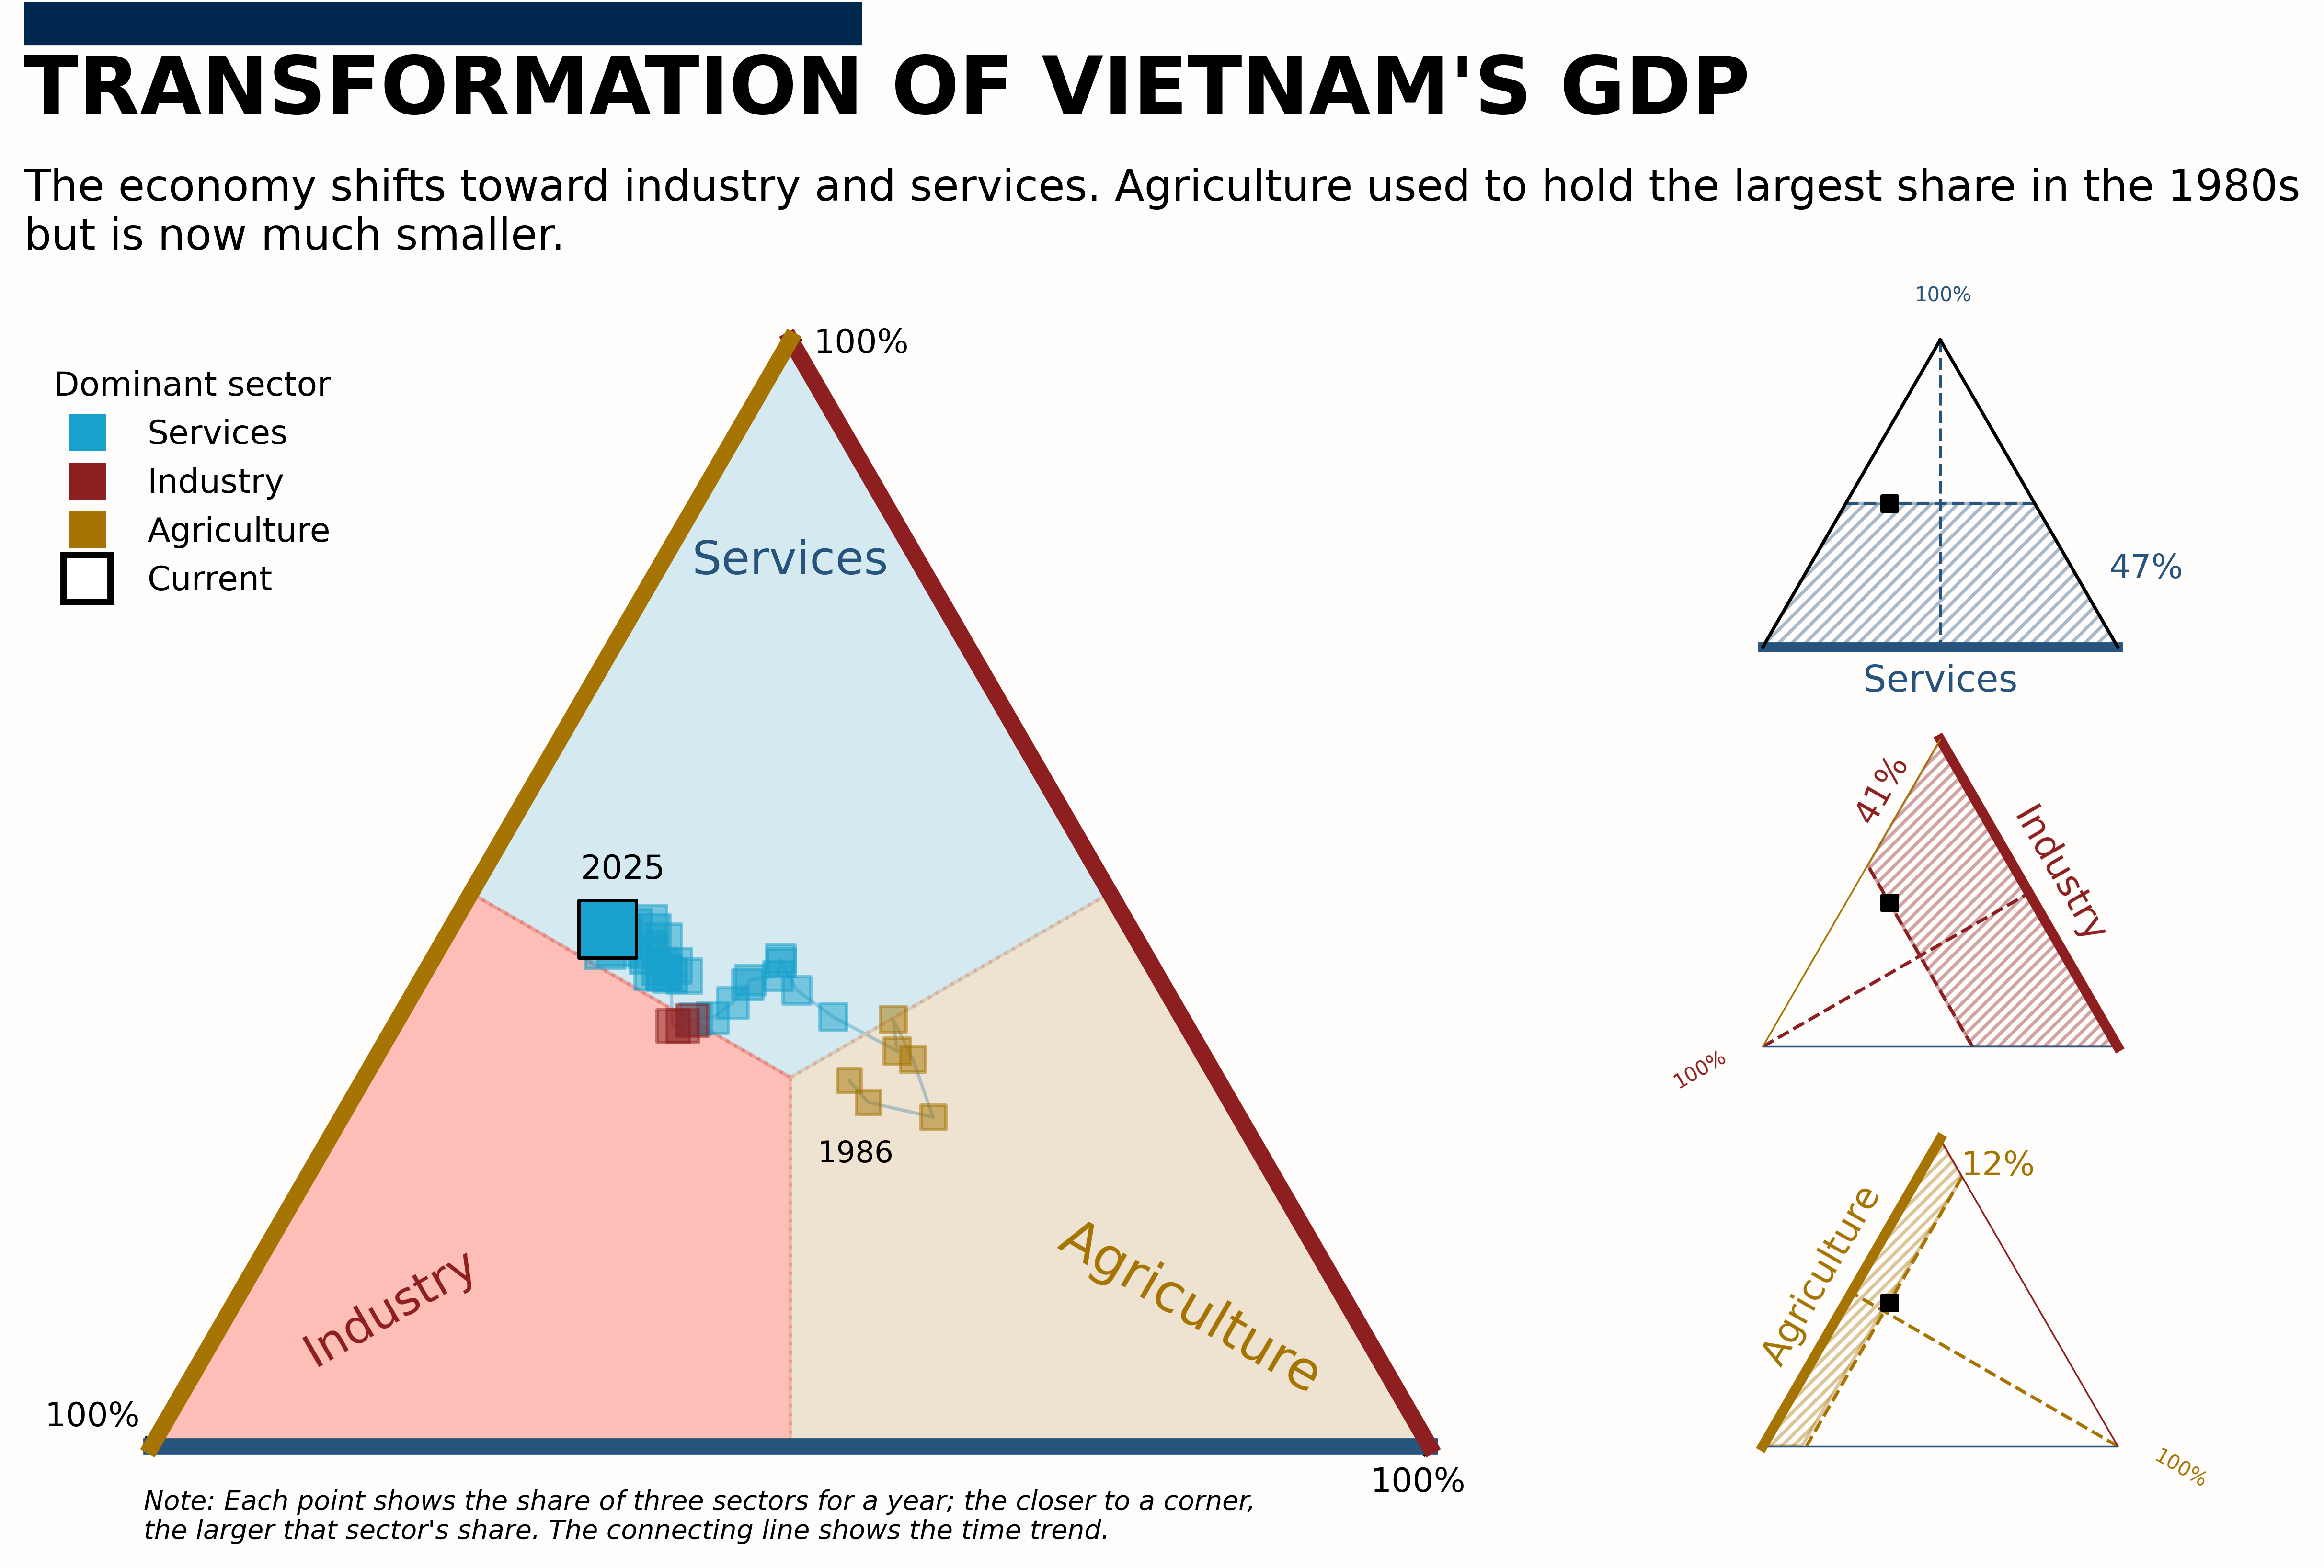

In [255]:
# Filter the source DataFrame for Vietnam and select relevant columns
dataset = df[df['Country Name'] == 'Viet Nam']
dataset = dataset[['Date', 'Services', 'Agriculture, forestry, and fishing', 'Industrial']]

# Calculate the sum of the three columns to normalize them into percentages
dataset['Total'] = (
    dataset['Services']
    + dataset['Agriculture, forestry, and fishing']
    + dataset['Industrial']
)

# Normalize each sector so the three columns sum to 100 for each row (year)
dataset['Services'] = (dataset['Services'] / dataset['Total']) * 100
dataset['Agriculture'] = (dataset['Agriculture, forestry, and fishing'] / dataset['Total']) * 100
dataset['Industry'] = (dataset['Industrial'] / dataset['Total']) * 100

# Drop the temporary 'Total' column (no longer needed)
dataset = dataset.drop(columns=['Total'])

# Keep only the columns we will use and sort by date (ascending)
dataset = dataset[['Date', 'Services', 'Agriculture', 'Industry']]
dataset = dataset.sort_values('Date')

# ------------------------
# PLOTTING: Create ternary plot
# ------------------------
fig = plt.figure(figsize=(10, 6), dpi=500, constrained_layout=True, facecolor='#fcf4e1')

# GridSpec: main large ternary on left, three small guides on the right
gs = fig.add_gridspec(
    nrows=3,
    ncols=2,
    width_ratios=[5, 1],
    left=0.02,
    right=0.98,
    wspace=0.0,   # keep small horizontal spacing
    hspace=0.3
)

# Main axes and three small guide axes (ternary projection provided by mpltern)
ax0 = fig.add_subplot(gs[:, 0], projection='ternary')  # main plot (tall)
ax1 = fig.add_subplot(gs[0, 1], projection='ternary')  # guide for Services reading
ax2 = fig.add_subplot(gs[1, 1], projection='ternary')  # guide for Industry reading
ax3 = fig.add_subplot(gs[2, 1], projection='ternary')  # guide for Agriculture reading

# Slight transparency for figure and axes background for visual effect
fig.patch.set_alpha(0.1)
ax0.patch.set_alpha(0.1)
ax1.patch.set_alpha(0.1)
ax2.patch.set_alpha(0.1)
ax3.patch.set_alpha(0.1)

# Color map for dominant sector (map sector name -> color)
color_map = {
    'Agriculture': '#A57402',  # color for Agriculture
    'Services': '#18a1cd',     # color for Services
    'Industry': '#8E1F20'      # color for Industry
}

# Determine dominant category (the sector with the highest share per row)
cols_to_check = ['Services', 'Industry', 'Agriculture']
dataset['dominant_category'] = dataset[cols_to_check].idxmax(axis=1)
point_colors = dataset['dominant_category'].map(color_map)

# Size scaling for points: older points smaller, newer points larger
min_size = 50   # size for the oldest datapoint
max_size = 150  # size for the newest datapoint
point_sizes = np.linspace(min_size, max_size, len(dataset))

# Plot a line connecting the points over time to show trend (same order as dataset)
ax0.plot(
    dataset["Services"], dataset["Industry"], dataset["Agriculture"],
    color='#0077b6',
    marker='o', markersize=0, markerfacecolor='#caf0f8', markeredgecolor='#0077b6',
    linestyle='-', linewidth=1, alpha=0.5,
    label='Trend over time', zorder=0
)

# Scatter data points on top of the trend line (colored by dominant sector)
ax0.scatter(
    dataset["Services"], dataset["Industry"], dataset["Agriculture"],
    c=point_colors, edgecolors=point_colors, s=point_sizes, marker='s',
    label='Data Points', alpha=0.5
)

# Highlight a specific date (year) for emphasis. Change highlight_date if you want a different year.
highlight_date = 2025
highlight_row = dataset[dataset['Date'] == highlight_date]
ax0.scatter(
    highlight_row["Services"], highlight_row["Industry"], highlight_row["Agriculture"],
    c='#18a1cd', edgecolors='black', s=300, marker='s', label=f'Date: {highlight_date}'
)

# Get the very first row (earliest date) for labeling on the plot
first_row = dataset[dataset['Date'] == dataset['Date'].min()]

# ------------------------
# Main triangle styling and axis labels (colors / widths)
# ------------------------
ax0.spines['tside'].set_color('#26547c')
ax0.spines['tside'].set_linewidth(5)  # thicker top spine
ax0.taxis.set_label_coords(0.5, -0.1)
# Place the top label text (Services)
ax0.text(80, 10, 10, "Services", ha='center', va='center', fontsize=14, color='#26547c')

ax0.spines['lside'].set_color('#8E1F20')
ax0.spines['lside'].set_linewidth(5)  # thicker left spine
ax0.laxis.set_label_coords(0.9, 0.5)
# Place left label text (Industry)
ax0.text(10, 60, 10, "Industry", ha='center', va='center', rotation=30, fontsize=14, color='#8E1F20')

ax0.spines['rside'].set_color('#A57402')
ax0.spines['rside'].set_linewidth(5)  # thicker right spine
ax0.raxis.set_label_coords(0.1, 0.5)
# Place right label text (Agriculture)
ax0.text(10, 10, 60, "Agriculture", ha='center', va='center', rotation=330, fontsize=16, color='#A57402')

# ------------------------
# Visual helpers: center point, midpoints, dotted connectors and filled regions
# ------------------------
# Center point coordinates (roughly equal shares)
center_t, center_l, center_r = 100/3, 100/3, 100/3

# Midpoints between corners to form three regions for shading
mid_t_l = (50, 50, 0)   # midpoint between top and left axes
mid_l_r = (0, 50, 50)   # midpoint between left and right axes
mid_r_t = (50, 0, 50)   # midpoint between right and top axes

# Dotted red lines from center to each midpoint (visual reference lines)
ax0.plot([center_t, mid_t_l[0]], [center_l, mid_t_l[1]], [center_r, mid_t_l[2]], 'r:', zorder=0, linewidth=1)
ax0.plot([center_t, mid_l_r[0]], [center_l, mid_l_r[1]], [center_r, mid_l_r[2]], 'r:', zorder=0, linewidth=1)
ax0.plot([center_t, mid_r_t[0]], [center_l, mid_r_t[1]], [center_r, mid_r_t[2]], 'r:', zorder=0, linewidth=1)

# Triangle corners (100% at each axis)
corner_t = (100, 0, 0)
corner_l = (0, 100, 0)
corner_r = (0, 0, 100)

# Region 1: towards the top corner (Services)
region1_t = [center_t, mid_t_l[0], corner_t[0], mid_r_t[0]]
region1_l = [center_l, mid_t_l[1], corner_t[1], mid_r_t[1]]
region1_r = [center_r, mid_t_l[2], corner_t[2], mid_r_t[2]]
ax0.fill(region1_t, region1_l, region1_r, color='lightblue', alpha=0.5, zorder=0, label='Services region')

# Region 2: towards the left corner (Industry)
region2_t = [center_t, mid_l_r[0], corner_l[0], mid_t_l[0]]
region2_l = [center_l, mid_l_r[1], corner_l[1], mid_t_l[1]]
region2_r = [center_r, mid_l_r[2], corner_l[2], mid_t_l[2]]
ax0.fill(region2_t, region2_l, region2_r, color='salmon', alpha=0.5, zorder=0, label='Industry region')

# Region 3: towards the right corner (Agriculture)
region3_t = [center_t, mid_r_t[0], corner_r[0], mid_l_r[0]]
region3_l = [center_l, mid_r_t[1], corner_r[1], mid_l_r[1]]
region3_r = [center_r, mid_r_t[2], corner_r[2], mid_l_r[2]]
ax0.fill(region3_t, region3_l, region3_r, color='#dfc7a7', alpha=0.5, zorder=0, label='Agriculture region')

# ------------------------
# Tick formatting (percentages)
# ------------------------
# NOTE: Original code uses PercentFormatter with xmax=1 even though data is 0-100.
# I did not change this logic; keeping as-is to preserve behavior.
ax0.taxis.set_major_formatter(PercentFormatter(decimals=0, xmax=1))
ax0.laxis.set_major_formatter(PercentFormatter(decimals=0, xmax=1))
ax0.raxis.set_major_formatter(PercentFormatter(decimals=0, xmax=1))
ax0.tick_params(labelrotation="horizontal")

# Keep the same tick positions as original code
ax0.taxis.set_ticks([1.0])
ax0.laxis.set_ticks([1.0])
ax0.raxis.set_ticks([1.0])

# ------------------------
# Labeling highlighted point and first datapoint
# ------------------------
# Get highlight point values (t = Services, l = Industry, r = Agriculture)
# NOTE: these .values[0] calls assume highlight_year exists in the dataset.
t = highlight_row["Services"].values[0]
l = highlight_row["Industry"].values[0]
r = highlight_row["Agriculture"].values[0]
ax0.text(t*1.2, l, r, highlight_date, color='black', fontsize=10, ha='center')

# Label the first/earliest datapoint (year)
ax0.text(
    first_row["Services"].values[0] * 0.7,
    first_row["Industry"].values[0],
    first_row["Agriculture"].values[0],
    int(first_row['Date'].values[0]),
    color='black', fontsize=9, ha='center'
)

# ------------------------
# Right-hand small guide plots to help read the ternary axes
# Each guide highlights how to read the percentage for one sector.
# ------------------------

# ax1: Guide for reading Services (top axis parallels)
ax1.grid(False)
ax1.spines['tside'].set_color('#26547c')
ax1.spines['tside'].set_linewidth(3)
ax1.spines['lside'].set_linewidth(1)
ax1.spines['rside'].set_linewidth(1)
ax1.taxis.set_ticks([])
ax1.laxis.set_ticks([])
ax1.raxis.set_ticks([])
ax1.scatter(t, l, r, c='black', s=20, marker='s', zorder=10)
ax1.plot([100, 0], [0, 100], [0, 100], color='#26547c', linestyle='--', linewidth=1)
ax1.plot([t, t], [0, 100 - t], [100 - t, 0], color='#26547c', linestyle='--', linewidth=1)
ax1.fill(
    [0, 0, t, t],
    [100, 0, 0, 100 - t],
    [0, 100, 100 - t, 0],
    color='white',
    alpha=0.4,
    hatch='//////',
    edgecolor='#26547c',
    zorder=0
)
ax1.text(t/2, -20, 100, f'{t:.0f}%', color='#26547c', fontsize=10, ha='center')
ax1.text(-10, 50, 50, "Services", ha='center', va='center', rotation=0, fontsize=11, color='#26547c')
ax1.text(100, -15, 0, '100%', color='#26547c', ha='right', va='top', fontsize=6)

# ax2: Guide for reading Industry (left axis parallels)
ax2.grid(False)
ax2.spines['lside'].set_color('#8E1F20')
ax2.spines['lside'].set_linewidth(3)
ax2.spines['tside'].set_color('#26547c')
ax2.spines['tside'].set_linewidth(0.5)
ax2.spines['rside'].set_color('#A57402')
ax2.spines['rside'].set_linewidth(0.5)
ax2.taxis.set_ticks([])
ax2.laxis.set_ticks([])
ax2.raxis.set_ticks([])
ax2.scatter(t, l, r, c='black', s=20, marker='s', zorder=10)
ax2.plot([0, 100], [100, 0], [0, 100], color='#8E1F20', linestyle='--', linewidth=1)
ax2.plot([0, 100 - l], [l, l], [100 - l, 0], color='#8E1F20', linestyle='--', linewidth=1)
ax2.fill(
    [100, 0, 0, 100 - l],
    [0, 0, l, l],
    [0, 100, 100 - l, 0],
    color='white',
    alpha=0.4,
    hatch='///////',
    edgecolor='#8E1F20',
    zorder=0
)
ax2.text(50, l/2, -2, f'{l:.0f}%', color='#8E1F20', rotation=60, fontsize=10, ha='center')
ax2.text(50, -10, 50, "Industry", ha='center', va='center', rotation=300, fontsize=11, color='#8E1F20')
ax2.text(0, 100, -15, '100%', color='#8E1F20', ha='center', va='top', fontsize=6, rotation=30)

# ax3: Guide for reading Agriculture (right axis parallels)
ax3.grid(False)
ax3.spines['rside'].set_color('#A57402')
ax3.spines['rside'].set_linewidth(3)
ax3.spines['tside'].set_color('#26547c')
ax3.spines['tside'].set_linewidth(0.5)
ax3.spines['lside'].set_color('#8E1F20')
ax3.spines['lside'].set_linewidth(0.5)
ax3.taxis.set_ticks([])
ax3.laxis.set_ticks([])
ax3.raxis.set_ticks([])
ax3.scatter(t, l, r, c='black', s=20, marker='s', zorder=10)
ax3.plot([0, 100], [0, 100], [100, 0], color='#A57402', linestyle='--', linewidth=1)
ax3.plot([100 - r, 0], [0, 100 - r], [r, r], color='#A57402', linestyle='--', linewidth=1)
ax3.fill(
    [100, 100 - r, 0, 0],
    [0, 0, 100, 100 - r],
    [0, r, r, 0],
    color='white',
    alpha=0.4,
    hatch='///////',
    edgecolor='#A57402',
    zorder=0
)
ax3.text(100 - r + 5, 0, r, f'{r:.0f}%', color='#A57402', fontsize=10)
ax3.text(50, 50, -10, "Agriculture", ha='center', va='center', rotation=60, fontsize=11, color='#A57402')
ax3.text(0, -15, 100, '100%', color='#A57402', ha='center', va='top', fontsize=6, rotation=-30)

# ------------------------
# Title, subtitle and footnote (translated to English)
# ------------------------
# Accent bar above the title (visual)
fig.add_artist(plt.Line2D([0.1, 0.45], [1.1, 1.1],
                         color='#00284e',
                         linewidth=13,
                         solid_capstyle='butt',
                         transform=fig.transFigure))

# Main title (English)
fig.text(0.1, 1.08, "TRANSFORMATION OF VIETNAM'S GDP",
         fontsize=24,
         fontweight='bold',
         color='#000000',
         ha='left', va='top',
         )

# Subtitle / short description in English
fig.text(0.1, 1.0,
         "The economy shifts toward industry and services. Agriculture used to hold the largest share in the 1980s\nbut is now much smaller.",
         fontsize=13,
         ha='left', va='top',
         )

# Footnote / legend explanation in English
fig.text(0.15, 0.08,
         "Note: Each point shows the share of three sectors for a year; the closer to a corner,\n"
         "the larger that sector's share. The connecting line shows the time trend.",
         fontsize=8,
         fontstyle='italic',
         ha='left', va='top',
         )

# ------------------------
# Create legend proxies for dominant sectors (so legend uses square markers)
# ------------------------
handle_service = plt.Line2D([], [], color=color_map['Services'], marker='s', markersize=10, linestyle='None', label='Services')
handle_industrial = plt.Line2D([], [], color=color_map['Industry'], marker='s', markersize=10, linestyle='None', label='Industry')
handle_agriculture = plt.Line2D([], [], color=color_map['Agriculture'], marker='s', markersize=10, linestyle='None', label='Agriculture')
handle_current = plt.Line2D([], [], color='white', marker='s', markersize=14, linestyle='None', label='Current', markeredgecolor='black', markeredgewidth=2)

# Collect handles and put them into the legend with an English title
handles = [handle_service, handle_industrial, handle_agriculture, handle_current]
ax0.legend(handles=handles, title="Dominant sector", loc='upper left',
           bbox_to_anchor=(-0.1, 1.0), fancybox=False, shadow=False, frameon=False,
           fontsize=10, title_fontsize=10)

plt.tight_layout(pad=0)
plt.show()